In [15]:
from data_pipeline import main
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = main().set_index('cbsa')
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p4323,p4324,p4325,p4326,p4327,p4328,p4329,p4330,p4331,gdp
cbsa,,,,,,,,,,,,,,,,,,,,,
winstonsalem_2017,2,2,2,3,3,3,6,6,6,3,...,7,7,7,12,12,12,23,23,23,29749.4
albuquerque_2016,1,1,1,1,1,1,3,3,3,2,...,1,1,1,1,1,1,1,1,1,43480.4
tulsa_2015,1,1,1,1,1,1,2,2,2,2,...,4,4,4,7,7,7,5,5,5,60542.7
cleveland_2016,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,4268.3
akron_2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35699.9


In [17]:
# X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [18]:
below, above = np.percentile(df['gdp'], [(100/3), (200/3)])

In [19]:
def conditions(col):
    if col['gdp'] < below:
        return 'small'
    elif col['gdp'] > below and col['gdp'] < above:
        return 'medium'
    else:
        return 'large'

    
    
df['gdp_size'] = df.apply(conditions, 1)
df['sum_of_pixels'] = df.sum(axis=1)

small = df[df['gdp_size'] == 'small'].iloc[:, -1]
medium = df[df['gdp_size'] == 'medium'].iloc[:, -1]
large = df[df['gdp_size'] == 'large'].iloc[:, -1]

# df['gdp_size_bi']

/home/jrsilber/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Is There A Signal?')

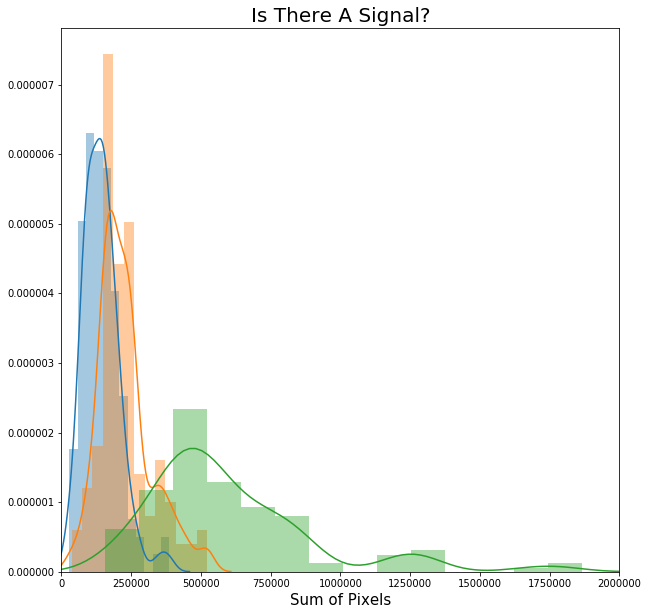

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(small)
sns.distplot(medium)
sns.distplot(large)
plt.xlim(0, 2000000)
ax.set_xlabel('Sum of Pixels', fontsize=15)
ax.set_title('Is There A Signal?', fontsize=20)

In [22]:
#PCA ANALYSIS ON SATELLITE IMAGES
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/home/jrsilber/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jrsilber/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
#orthogonal? 
np.dot(pca.components_[0], pca.components_[1])

1.0408340855860843e-17

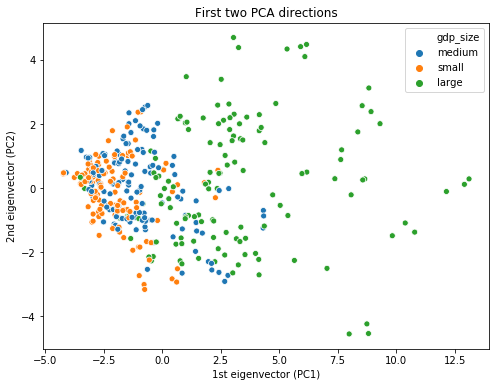

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=df['gdp_size'])
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");

In [ ]:
#pick the correct number of PC 